# ANN START

## PERCEPTRON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("placements.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

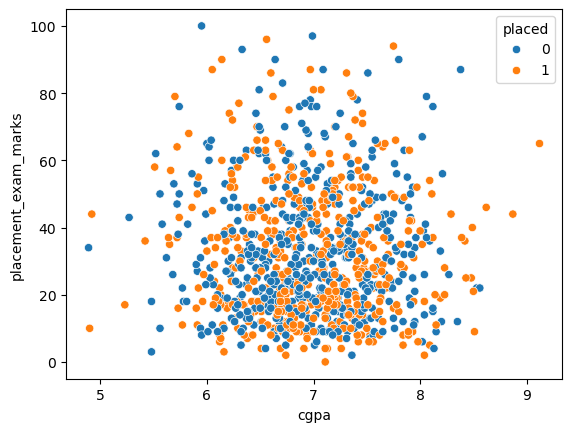

In [3]:
sns.scatterplot(x='cgpa', y='placement_exam_marks', hue='placed', data=df)

In [4]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [5]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [6]:
p.fit(X,y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [7]:
p.coef_

array([[-25.65,  -8.  ]])

In [8]:
p.intercept_

array([-15.])

In [9]:
from mlxtend.plotting import plot_decision_regions

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

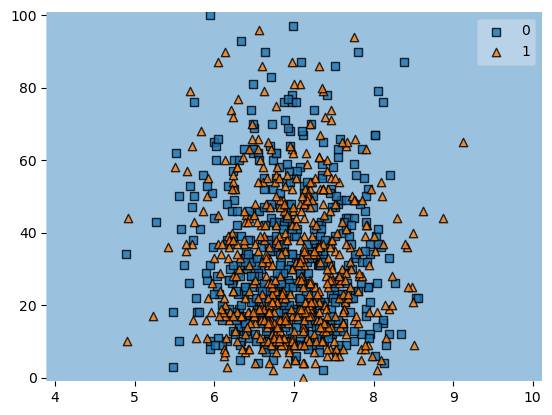

In [10]:
plot_decision_regions(X.values, y.values, clf=p)

### PERCEPTRON TRICK

In [11]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                            n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

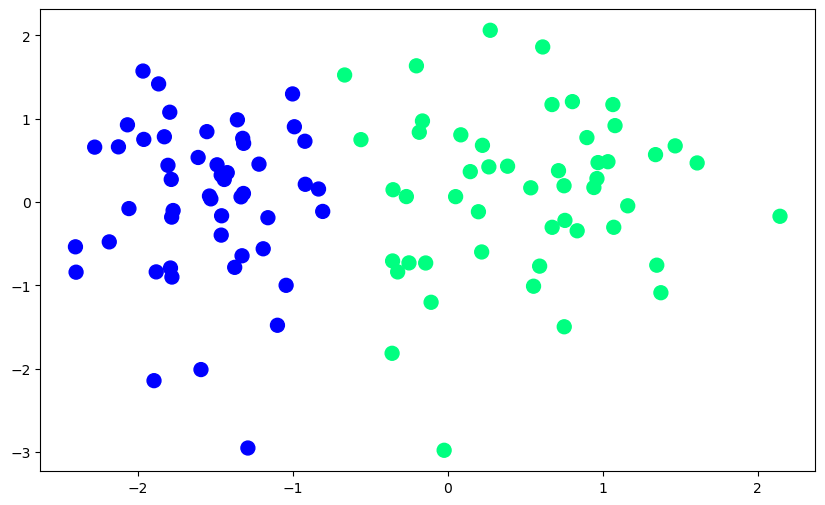

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [13]:
def step(z):
    return 1 if z>0 else 0

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [15]:
intercept_,coef_ = perceptron(X,y)

In [16]:
print(coef_)
print(intercept_)

[1.34562446 0.06204904]
1.0


In [17]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

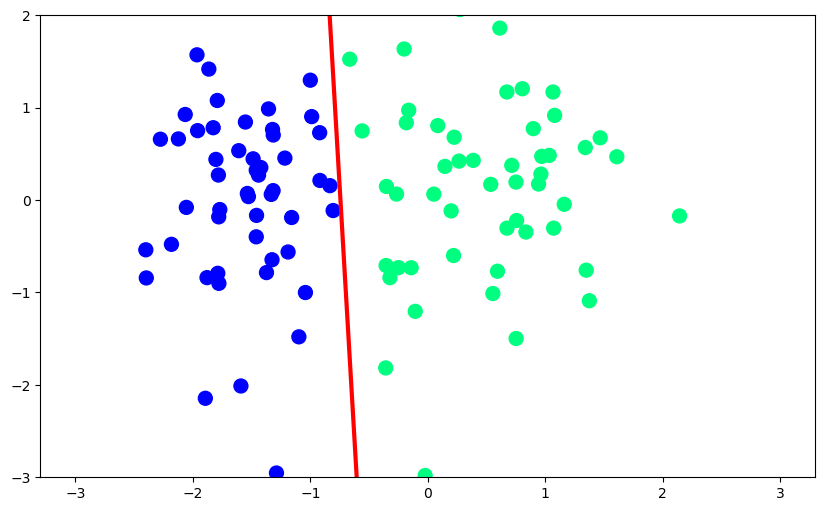

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)